C:\Users\doria\AppData\Local\Temp\ipykernel_25048\864549290.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


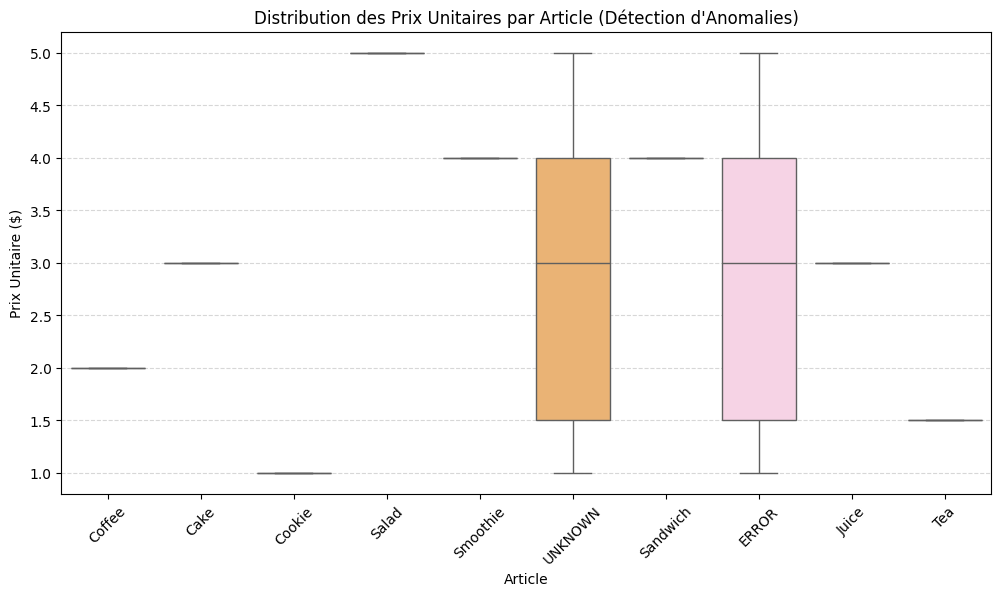

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Chargement et conversion
df = pd.read_csv('../DATA/RAW/dirty_cafe_sales.csv')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')

# 2. Création de la Boîte à Moustaches (Boxplot)
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df, 
    x='Item', 
    y='Price Per Unit', 
    palette='Set3'  # Une couleur différente par article
)

plt.title('Distribution des Prix Unitaires par Article (Détection d\'Anomalies)')
plt.xlabel('Article')
plt.ylabel('Prix Unitaire ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

In [1]:
import pandas as pd

# 1. Chargement des données brutes
df = pd.read_csv('../DATA/RAW/dirty_cafe_sales.csv')

# 2. Trouver les VRAIS vides (NaN)
# C'est cette commande qui vous donne les chiffres que vous avez cités
print("--- COMPTE DES VALEURS MANQUANTES (VIDES) ---")
print(df.isnull().sum())

# 3. Trouver les "FAUX" vides (ERROR / UNKNOWN)
# C'est important car pour l'ordinateur, "UNKNOWN" n'est pas vide, c'est du texte !
# On va compter combien de fois ces mots apparaissent dans chaque colonne.

print("\n--- COMPTE DES VALEURS 'SALES' (ERROR / UNKNOWN) ---")
colonnes_a_verifier = ['Item', 'Quantity', 'Price Per Unit', 'Total Spent', 'Payment Method', 'Location', 'Transaction Date']

for col in colonnes_a_verifier:
    # On compte les "ERROR"
    nb_error = df[col].astype(str).str.contains('ERROR', case=False).sum()
    # On compte les "UNKNOWN"
    nb_unknown = df[col].astype(str).str.contains('UNKNOWN', case=False).sum()
    
    if nb_error > 0 or nb_unknown > 0:
        print(f"Colonne {col} : {nb_error} 'ERROR' + {nb_unknown} 'UNKNOWN'")

--- COMPTE DES VALEURS MANQUANTES (VIDES) ---
Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

--- COMPTE DES VALEURS 'SALES' (ERROR / UNKNOWN) ---
Colonne Item : 292 'ERROR' + 344 'UNKNOWN'
Colonne Quantity : 170 'ERROR' + 171 'UNKNOWN'
Colonne Price Per Unit : 190 'ERROR' + 164 'UNKNOWN'
Colonne Total Spent : 164 'ERROR' + 165 'UNKNOWN'
Colonne Payment Method : 306 'ERROR' + 293 'UNKNOWN'
Colonne Location : 358 'ERROR' + 338 'UNKNOWN'
Colonne Transaction Date : 142 'ERROR' + 159 'UNKNOWN'
